#### **I. Analysis with no-rep**

##### Logic: Here, the participant had to compare pairs of different textures. They had to arrange them in a scale from 1 to 9 (1-same, 9-really different). The only pair with two time the same texture was the pair with the ref, texture 2.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import pandas as pd
import seaborn as sns

In [2]:
#import data
path = "C:/Users/Jenna/Documents/isir/haptics/psychophysics/fish_tank/new_texture/result/*.csv"
columns = ["T1","T2","Scale"]  #scale: 1 same -9 different #pas de doublons sauf texture 2 (reference)

for filename in glob.glob(path):
    df = pd.read_csv(filename, sep=",", header=None)
    df.columns = columns
    display(df)

,T1,T2,Scale
0,1,2,9
1,1,3,9
2,1,4,9
3,2,1,9
4,2,3,9
...,...,...,...
60,3,2,7
61,3,4,5
62,4,1,2
63,4,2,4


,T1,T2,Scale
0,1,2,3
1,1,3,5
2,1,4,1
3,2,2,2
4,2,1,1
...,...,...,...
60,3,2,9
61,3,4,9
62,4,1,1
63,4,2,2


,T1,T2,Scale
0,1,2,3
1,1,3,7
2,1,4,2
3,2,1,6
4,2,3,8
...,...,...,...
60,3,4,8
61,4,1,3
62,4,2,2
63,4,3,9


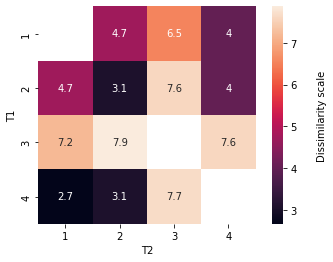

In [8]:
#import data

import matplotlib.pyplot as plt 

path = "C:/Users/Jenna/Documents/isir/haptics/psychophysics/fish_tank/new_texture/result"  
filenames = glob.glob(path + "/*.csv")
column = ["T1","T2","Scale"]
df = []

for filename in filenames:
    df.append(pd.read_csv(filename, sep=",", header = None))
    
#concatenate files
big_frame = pd.concat(df)  #ignore_index=True      
big_frame.columns = column 
#display(big_frame)

#groupby
df2 = big_frame.groupby(["T1","T2"]).agg({"Scale": "mean"})
#df2

#heatmap ~ similiarity matrix for us
piv = pd.pivot_table(big_frame, values="Scale",index=['T1'], columns=['T2'])
a = sns.heatmap(piv, square=True, annot =True) #, cbar_kws={'label': 'similarity scale'}

cbar = a.collections[0].colorbar
cbar.set_label('Dissimilarity scale', labelpad=20)
plt.savefig("dissimilarity_matrix.png")